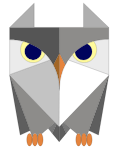

# Rezel AI
## Workshop 01: Linear Regression

_Authors: Denis Fouchard, Vincent Bardusco_

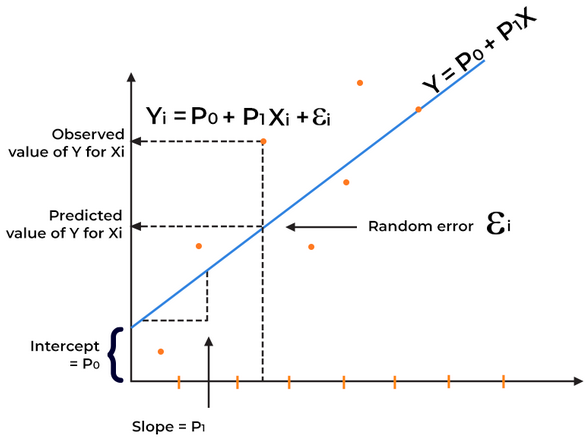

## Reminders

- $(X,Y)$ is our dataset containing $n$ data samples and $p$ features.  
$X$ is a $n \times p$ matrix.  
$Y$ is a vector of size $n$.  
- We assume that there exists a linear relation between $X$ and $Y$, ie $\exists \theta^*_1, \theta^*_2, ..., \theta^*_p$ such that $$\forall i \in [[1,n]], Y_i = \theta^*_1 X_{i,1} + \theta^*_2 X_{i,2} + ... + \theta^*_p X_{i,p} + \epsilon_i$$ with $\epsilon_i$ a random error between the model and the data
- Our aim is to estimate the set of parameters $\theta$ that best approximate the linear relation between $X$ and $Y$.   
It means that we want to find $\theta$ so that $Y_\theta = X\theta$ is the 'closest' to $Y$.  
_Note: we can't find the perfect set of parameters $\theta^*$ because the noise $\epsilon$ is random and unknown!_
- We define the regression model by using the Ordinary Least Square (OLS) loss function: $$\mathcal{L}(Y_\theta,Y) = \lVert Y - Y_\theta \rVert^2 = \lVert Y - X\theta \rVert^2 $$  
_Note: why this loss function? Because it penalizes strongly the large differences between our predictions $Y_\theta$ and the ground truth $Y$ while not penalizing much the small differences (which is good because the prediction will never be exactly equal to $Y$, we only want to be as close as possible), and also because it is quite easy to minimize._  
- And we then want to calculate the OLS estimator $\hat{\theta}$ defined by: $$\hat{\theta} = argmin_\theta \mathcal{L}(Y_\theta,Y) = argmin_\theta \lVert Y - X\theta \rVert^2 $$
- We have an exact solution which is: $$\hat{\theta} = (X^TX)^{-1}X^TY$$

## Part 1: Toy example

To understand better how linear regression works, we will begin with a toy example where we will take a super simple linear function f defined by:
$$\forall x \in \mathbb{R}, y = f(x) = ax$$
with $a \in \mathbb{R}$. It means that we have only 1 feature: $p=1$.  

We will take 100 data samples in total, ie $n=100$.

### Toy dataset generation

To begin with, chose a value of $a$ (which we will then want to estimate with our regression model) then plot the theoretical function $f$.

In [1]:
import numpy as np
#Set the random seed for reproductibility
np.random.seed(42)
import matplotlib.pyplot as plt

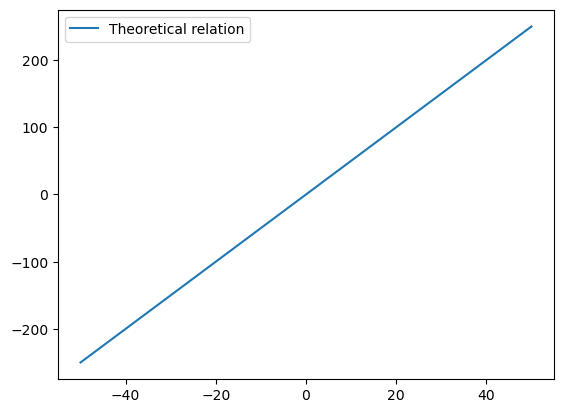

In [2]:
# Set the slope value
a = 5# TO COMPLETE

# Generate theoretical data to plot
X_theory = np.linspace(-50,50,100)
Y_theory = a*X_theory # TO COMPLETE

# Plot the theoretical relation we will want to estimate
_ = plt.plot(X_theory,Y_theory, label="Theoretical relation")
_ = plt.legend()

In reality, we never will have a perfect dataset where the modelisation we decided to use (here a linear relation) is perfectly respected by 100% of our data samples (otherwise two points would be enough to find $a$!).    


To be clearer, let's take a real example: we have a hanged spring, and we know that Hooke's law states that the force applied to the spring $F$ is given by $F = -k \times x$ where $x$ is the deplacement from the equilibrium position and $k$ is a constant. We make an experiment where we want to verify Hooke's law. We then will measure several deplacement values along with the corresponding applied force values, and will do a linear regression to calculate the value of the constant. Obviously, there will be mistakes on the values (which can be very small) induced by the measurements, the conditions of the experiment, ... We then want to use all the values we measured to estimate the constant $k$ as accurately as possible using linear regression.  


To represent this randomness in the values, we will add some noise to the data, which will give us observed values given by: $$y = ax + \epsilon$$ with $\epsilon$ a Gaussian noise.

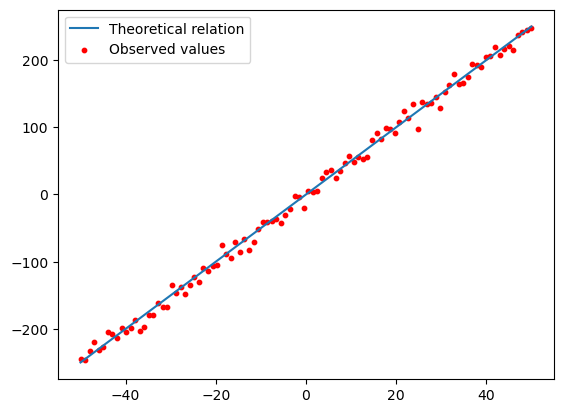

In [3]:
# Generate random gaussian noise
noise = np.random.normal(0,10,100)

# Generate random samples of data following the linear relation with some noise added
X = np.linspace(-50,50,100)
Y = a*X + noise #TO COMPLETE

# Plot the data samples along with the theoretical relation
_ = plt.plot(X_theory,Y_theory, label="Theoretical relation")
_ = plt.scatter(X,Y,label="Observed values", color='r', s=10)
_ = plt.legend()

### Train/Test split

Now that we have our dataset of 100 samples, we will split it between training and testing sets, which is an extremely common practice in data science.  

The idea is that we want to use the major part of our dataset to have the most precise estimation of parameters possible, but we actually want to keep a small part of the dataset so that once our set of parameters is estimated, we can test the quality of the prediction on this small, never seen before part of the dataset, it will thus give us a good idea of how the model performs on new data! (it would be pretty bad if we only had good results on already seen data, the objective is to determine a general relation between $X$ and $Y$, which should work for any $X$)  


Your first task will then be to create a training set $(X_{train},Y_{train})$ containing 80% of the data and a testing set $(X_{test},Y_{test})$ with 20% of the data.  
_Warning: to ensure the training and testing set both represent well the whole dataset, the data samples forming these sets should be taken at random, don't simply put the first 80% of the data into training and the last 20% into testing!_  
_Hint: look at the np.random.shuffle function_

In [4]:
def train_test_split(X,Y,train_proportion=0.8):
    
    n = len(X)

    indices = np.arange(n)
    np.random.shuffle(indices) #TO COMPLETE

    X_train = X[indices[:int(train_proportion*n)]] #TO COMPLETE
    Y_train = Y[indices[:int(train_proportion*n)]] #TO COMPLETE
    X_test = X[indices[:int((1-train_proportion)*n)]] #TO COMPLETE
    Y_test = Y[indices[:int((1-train_proportion)*n)]] #TO COMPLETE

    return X_train,Y_train,X_test,Y_test

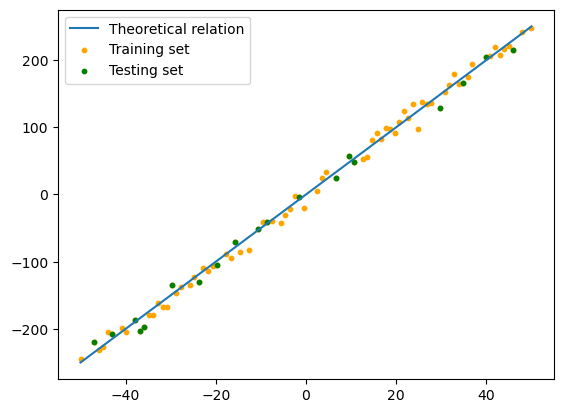

In [5]:
# Split the data between training and testing set
X_train,Y_train,X_test,Y_test = train_test_split(X,Y,0.8) # TO COMPLETE

# Plot the data along with the theoretical relation
_ = plt.plot(X_theory,Y_theory, label="Theoretical relation")
_ = plt.scatter(X_train,Y_train,label="Training set", color='orange', s=10)
_ = plt.scatter(X_test,Y_test,label="Testing set", color='g', s=10)
_ = plt.legend()

### Ordinary Least Squares: sklearn

Now that everything is prepared, it is time to dive into machine learning! We will learn on the data from the training set to estimate our parameter $a$, and then check how our predictions perform on the testing set!

To begin with, we will use sklearn built-in function to perform the linear regression, then we will recode it from scratch and hopefuly find the same results!

In [6]:
from sklearn import linear_model
OLS = linear_model.LinearRegression(fit_intercept=False, copy_X=True)

Our regression model is $OLS$.  
In general, all machine learning models will have two extremely useful methods:
- $fit$ which will be used to fit the model on the training set 
- $predict$ which will be used to make a prediction on unseen data (on the testing set for example)    

You will then have to use $OLS.fit$ and $OLS.predict$ to train and test the linear regression model!  


Don't hesitate to consult the model documentation to have more precise info: check [this link](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression)


      Ground truth value: a = 5,
      Estimated value: a = 5.01
      


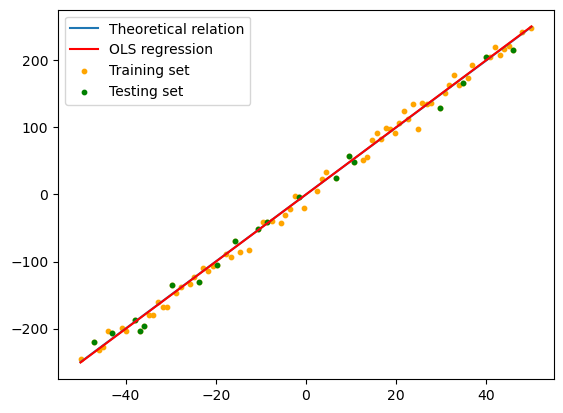

In [7]:
# Reshape X as a matrix
X_train_matrix = X_train.reshape(-1,1)

# Fit the OLS model on the training set
OLS.fit(X_train_matrix,Y_train) # TO COMPLETE

# Get the estimated parameter
theta_estimated = OLS.coef_
a_estimated = theta_estimated[0]

print("""
      Ground truth value: a = {},
      Estimated value: a = {}
      """.format(a,a_estimated.round(2)))

# Plot the linear relation found and compare it to the theoretical one
Y_estimated = a_estimated * X_theory # TO COMPLETE
_ = plt.plot(X_theory,Y_theory, label="Theoretical relation")
_ = plt.plot(X_theory,Y_estimated, color='r', label="OLS regression")
_ = plt.scatter(X_train,Y_train,label="Training set", color='orange', s=10)
_ = plt.scatter(X_test,Y_test,label="Testing set", color='g', s=10)
_ = plt.legend()

The results seem pretty good! (Or should seem pretty good :D)  

To have a quantified idea of how well our regression modelizes the link between $X$ and $Y$, let's compute the mean squared error between our prediction and the ground truth on the test set which has never been seen by the model until now.

In [8]:
# Reshape X as a matrix
X_test_matrix = X_test.reshape(-1,1)

# Predict the output Y on the test set with our model
Y_test_predict = OLS.predict(X_test_matrix) # TO COMPLETE

# Compute the mean squared error
MSE = ((Y_test - Y_test_predict)**2).mean() # TO COMPLETE
print("Mean Squared Error: {}".format(MSE))

Mean Squared Error: 123.79531586035795


### Ordinary Least Squares: your turn

Now, the objective is to obtain the same result but by recreating from scratch the regression model. We will create a $OrdinaryLeastSquares$ class with a parameter $coef\_$ and two methods $fit$ and $predict$.  
_Hint: you can check the formula to compute the regression in the recap at the beginning of the notebook, and use np.linalg.inv to compute the inverse of a matrix_

In [9]:
from sklearn.base import BaseEstimator, RegressorMixin

class OrdinaryLeastSquares(BaseEstimator, RegressorMixin):

    def __init__(self):
        self.coef_ = None

    def fit(self,X_train,Y_train):
        """ Fit is the method that trains the model on the training set.
        !!! You should only give the training set as input !!!!
        X_train: numpy array of shape (n_samples, n_features)
        Y_train: numpy array of shape (n_samples, 1)

        This method should update the self.coef_ attribute with the estimated 
        parameters but SHOULD NOT RETURN ANYTHING !!
        """
        self.coef_ = np.linalg.inv(X_train.T@X_train)@X_train.T@Y_train # TO COMPLETE

    def predict(self,X):
        """ Predict is the method that predicts 
        the output Y for a given input X.
        This is the only method that should be used after training the model.
        X: numpy array of shape (n_samples, n_features)
        
        Note : the array can be of shape (1, n_features) if you 
        want to predict only one sample."""

        return X@self.coef_ # TO COMPLETE
    

Now, let's test our model and see if we get the same results as with sklearn's!


      Ground truth value: a = 5,
      Estimated value: a = 5.01
      


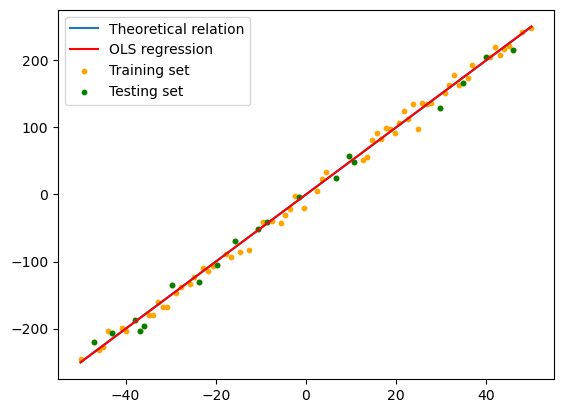

In [10]:
# Instanciate the model
OLSCustom = OrdinaryLeastSquares()

# Reshape X as a matrix
X_train_matrix = X_train.reshape(-1,1)

# Fit the OLS model on the training set
OLSCustom.fit(X_train_matrix,Y_train) # TO COMPLETE

# Get the estimated parameter
theta_estimated = OLSCustom.coef_
a_estimated = theta_estimated[0]

print("""
      Ground truth value: a = {},
      Estimated value: a = {}
      """.format(a,a_estimated.round(2)))

# Plot the linear relation found and compare it to the theoretical one
Y_estimated = a_estimated * X_theory # TO COMPLETE
_ = plt.plot(X_theory,Y_theory, label="Theoretical relation")
_ = plt.plot(X_theory,Y_estimated, color='r', label="OLS regression")
_ = plt.scatter(X_train,Y_train,label="Training set", color='orange', s=10)
_ = plt.scatter(X_test,Y_test,label="Testing set", color='g', s=10)
_ = plt.legend()

In [11]:
# Reshape X as a matrix
X_test_matrix = X_test.reshape(-1,1)

# Predict the output Y on the test set with our model
Y_test_predict = OLSCustom.predict(X_test_matrix) # TO COMPLETE

# Compute the mean squared error
MSE = ((Y_test - Y_test_predict)**2).mean() # TO COMPLETE
print("Mean Squared Error: {}".format(MSE))

Mean Squared Error: 123.79531586035769


If everything went well, you should get the exact same result as with sklearn's model!

## Part 2: House price prediction

Now that you have tested linear regression on a toy dataset, it is time to see what such a model can do on real-world data.  


The file $estate\_data.csv$ contains information on several characterstics of houses (number of bedrooms, size, quality of the view, condition, ...) along with the price they were sold for.  
Our objective will be to use this data to establish a regression model so that we will be able to predict the price of a house depending on its characteristics.  


We will see in another workshop how to extract and treat data, for this one we will prebuild X and Y for you, and you will use them to build your model.  

In [12]:
import pandas as pd

In [13]:
# Load and display the data
data = pd.read_csv('estate_data.csv')
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [14]:
# Remove the columns 'date', 'street', 'statezip' and 'country' from the data
data = data.drop('date',axis=1)
data = data.drop('street',axis=1)
data = data.drop('statezip',axis=1)
data = data.drop('country',axis=1)

# We also drop 'sqft_living' because it is the sum of 'sqft_above' and 'sqft_basement', our model assumes that the features are independent
data = data.drop('sqft_living',axis=1)

# Remove the rows where the price is 0
data = data[data['price'] != 0]

# Normalize the columns 'sqft_lot', 'sqft_above', 'sqft_basement'
data['sqft_lot'] = (data['sqft_lot'] - data['sqft_lot'].mean())/data['sqft_lot'].std()
data['sqft_above'] = (data['sqft_above'] - data['sqft_above'].mean())/data['sqft_above'].std()
data['sqft_basement'] = (data['sqft_basement'] - data['sqft_basement'].mean())/data['sqft_basement'].std()

# One-hot encode the column 'city'
data = pd.get_dummies(data, columns=['city'])

# Display the data
data.head()

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,...,city_SeaTac,city_Seattle,city_Shoreline,city_Skykomish,city_Snoqualmie,city_Snoqualmie Pass,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point
0,313000.0,3.0,1.50,-0.192505,1.5,0,0,3,-0.564363,-0.671339,...,0,0,1,0,0,0,0,0,0,0
1,2384000.0,5.0,2.50,-0.160863,2.0,0,4,5,1.811426,-0.065263,...,0,1,0,0,0,0,0,0,0,0
2,342000.0,3.0,2.00,-0.080310,1.0,0,0,4,0.126137,-0.671339,...,0,0,0,0,0,0,0,0,0,0
3,420000.0,3.0,2.25,-0.189224,1.0,0,0,4,-0.962279,1.493221,...,0,0,0,0,0,0,0,0,0,0
4,550000.0,4.0,2.50,-0.120545,1.0,0,0,4,-0.798431,1.060309,...,0,0,0,0,0,0,0,0,0,0


In [15]:
# Convert the data to numpy arrays
X = data.drop('price',axis=1).values
Y = data['price'].values

Your turn now! Don't forget to use the functions you have built before, and here is a basic guideline to remind you what you have to do:
- Split the data between training and testing set
- Fit the model on the training set
- Test the quality of your model on the testing set

In [16]:
# Split the data between training and testing set
X_train,Y_train,X_test,Y_test = train_test_split(X,Y,0.8) # TO COMPLETE

In [17]:
# Instanciate the model
OLSCustom = OrdinaryLeastSquares() # TO COMPLETE

# Fit the OLS model on the training set
OLSCustom.fit(X_train,Y_train) # TO COMPLETE

In [18]:
# Predict the output Y on the test set with our model
Y_test_predict = OLSCustom.predict(X_test) # TO COMPLETE

# Compute the mean squared error
MSE = ((Y_test - Y_test_predict)**2).mean() # TO COMPLETE
print("Mean Squared Error: {}".format(MSE))

Mean Squared Error: 202902159141.0702


What does this mean squared error mean? Is it big? Compared to what?    
How could we use it?

Let's compute the mean percentage error to see on average how far we are from the predictions!

In [19]:
# Compute mean percentage error
MPE = 100*(np.abs(Y_test - Y_test_predict)/(Y_test)).mean() # TO COMPLETE
print("Mean Percentage Error: {}".format(MPE.round(1)))

Mean Percentage Error: 26.4


Finally, let's draw some random samples, predict the price, and manually compare how far our prediction is from the reality, to give us an insight of how our model performs.  
_Tip: You can rerun this cell several times to check more values at random!_

Predicted price: 932918.05, True price: 888550.0, Percentage error: 5.0
Predicted price: 436895.42, True price: 275000.0, Percentage error: 58.9
Predicted price: 946927.86, True price: 670000.0, Percentage error: 41.3
Predicted price: 519565.51, True price: 467000.0, Percentage error: 11.3
Predicted price: 223837.55, True price: 315000.0, Percentage error: 28.9
Predicted price: 324543.83, True price: 499950.0, Percentage error: 35.1
Predicted price: 280599.16, True price: 260000.0, Percentage error: 7.9
Predicted price: 606658.04, True price: 668750.0, Percentage error: 9.3
Predicted price: 320975.12, True price: 240000.0, Percentage error: 33.7
Predicted price: 264704.73, True price: 339000.0, Percentage error: 21.9


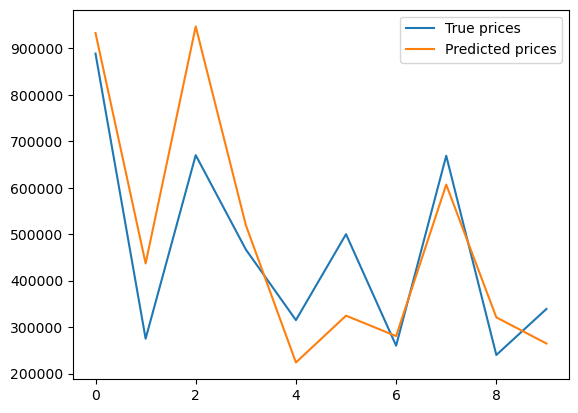

In [20]:
# Draw 10 random indices
indices = np.random.randint(0,len(X_test),10) # TO COMPLETE

for i in indices:
    print("Predicted price: {}, True price: {}, Percentage error: {}".format(Y_test_predict[i].round(2),Y_test[i].round(2), (100*np.abs(Y_test_predict[i] - Y_test[i])/Y_test[i]).round(1))) # TO COMPLETE

# Plot the predicted prices and the true prices
_ = plt.plot(Y_test[indices],label="True prices")
_ = plt.plot(Y_test_predict[indices],label="Predicted prices")
_ = plt.legend()

How well does our model perform according to you? What could explain the differences between the ground truth and the predicted values?

## Part 3 : You are the data scientist

Now it is your turn to be the data scientist! We give you a dataset, some tools and you do the rest.
For that you will need to learn what is a SVM and how to use it. Click [this link](https://scikit-learn.org/stable/modules/svm.html ) to know more. 

In [21]:
from sklearn import datasets, svm

iris = datasets.load_iris()
X = iris.data
y = iris.target

print(f"The data has {X.shape[0]} samples and {X.shape[1]} features")

The data has 150 samples and 4 features


In [22]:
X = X[y != 0, :2]
y = y[y != 0]

n_sample = len(X)

np.random.seed(0)
order = np.random.permutation(n_sample)
X = X[order]
y = y[order].astype(float)

You have data points that belong to two distinct classes (the red on and the blue one). You have to find a way to separate them with a line, in order to be able to predict the class of a new data point.

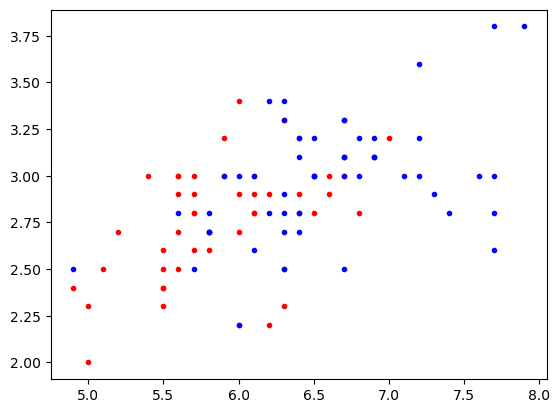

In [23]:
plt.plot(X[y == 1, 0], X[y == 1, 1], 'r.', label='Class 1')
plt.plot(X[y == 2, 0], X[y == 2, 1], 'b.', label='Class 2')

You have to :
- Split the data between training and testing set
- Instanciate the model
- Fit the model on the training set
- Predict the output Y on the test set with our model
- Compute the mean squared error
- Compute mean percentage error


You should get this result at the end with the basic model : 

![image.png](https://scikit-learn.org/stable/_images/sphx_glr_plot_iris_exercise_001.png)

If you have finished, you can explore some more advanced kernels to improve separation. For that see [this link](https://scikit-learn.org/stable/auto_examples/svm/plot_svm_kernels.html#sphx-glr-auto-examples-svm-plot-svm-kernels-py).

Mean Squared Error: 0.2631578947368421
Mean Percentage Error: 18.4


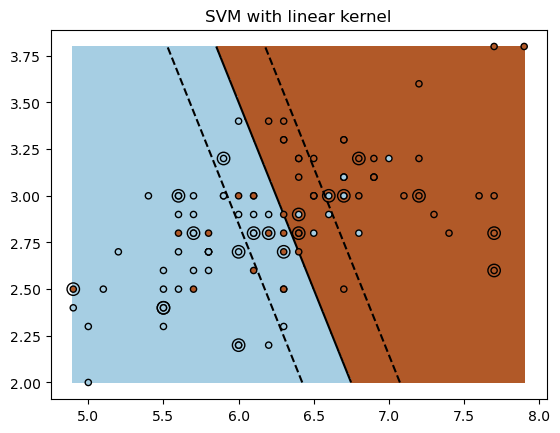

In [24]:
# SOLUTION

# Split the data between training and testing set
X_train,Y_train,X_test,Y_test = train_test_split(X,y,0.8)

# Instanciate the model
SVM = svm.SVC(kernel='linear')

# Fit the SVM model on the training set
SVM.fit(X_train,Y_train)

# Predict the output Y on the test set with our model
Y_test_predict = SVM.predict(X_test)

# Compute the mean squared error
MSE = ((Y_test - Y_test_predict)**2).mean()
print("Mean Squared Error: {}".format(MSE))

# Compute mean percentage error
MPE = 100*(np.abs(Y_test - Y_test_predict)/(Y_test)).mean()
print("Mean Percentage Error: {}".format(MPE.round(1)))




# Plot the result (code from sklearn)
plt.figure()
plt.clf()
plt.scatter(
    X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired, edgecolor="k", s=20
)

# Circle out the test data
plt.scatter(
    X_test[:, 0], X_test[:, 1], s=80, facecolors="none", zorder=10, edgecolor="k"
)

plt.axis("tight")
x_min = X[:, 0].min()
x_max = X[:, 0].max()
y_min = X[:, 1].min()
y_max = X[:, 1].max()

XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
Z = SVM.decision_function(np.c_[XX.ravel(), YY.ravel()])

# Put the result into a color plot
Z = Z.reshape(XX.shape)
plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
plt.contour(
    XX,
    YY,
    Z,
    colors=["k", "k", "k"],
    linestyles=["--", "-", "--"],
    levels=[-0.5, 0, 0.5],
)

plt.title("SVM with linear kernel")
plt.show()
